Let's see if we can run the astrometry metrics in a vectorized manner, so we can easily visualize the magnitude variation of things

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import lsst.sims.maf.plots as plots
import healpy as hp

In [2]:
nside = 16

opsdb = db.OpsimDatabase('minion_1016_sqlite.db')
outDir = 'output'
sql='night < 365'
resultsDb = db.ResultsDb(outDir=outDir)
plotFuncs = [plots.TwoDMap()]

In [3]:
bundleList = []
mags = np.arange(15.,30,1)
metric = metrics.ParallaxMetric(rmag=mags)
slicer = slicers.HealpixSlicer(nside=nside, latCol='ditheredDec', lonCol='ditheredRA')
plotDict = {'xlabel':'mag', 'cbarTitle':'mas', 'colorMax':10, 'xextent':[mags.min(), mags.max()]}
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, plotFuncs=plotFuncs))

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes


Querying database with constraint night < 365
Found 262451 visits
Running:  ['opsim_parallax_night_lt_365_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with night < 365 sqlconstraint now.
Plotting complete.


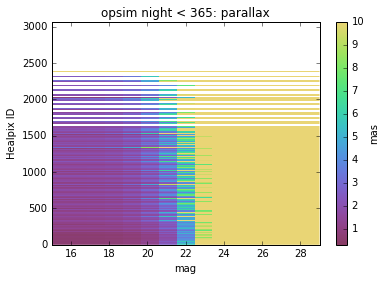

In [4]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
group = metricBundles.MetricBundleGroup(bd, opsdb, outDir=outDir,
                                        resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)

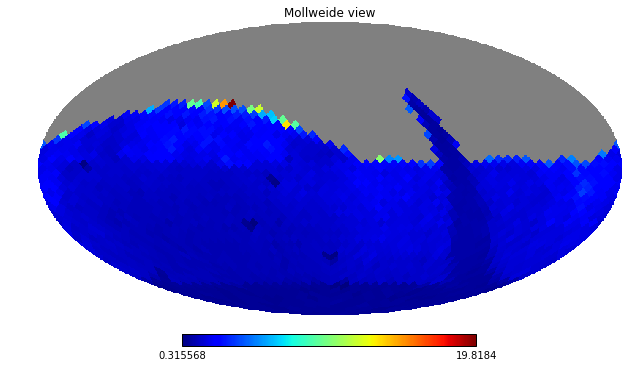

In [5]:
# Note that each column in the above image is a full healpixel map
hp.mollview(bundleList[0].metricValues[:,3])
